In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_it_support_tickets.csv")
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,3.0,NaN,4
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,3.0,NaN,4
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2023-06-01 18:05:38,1
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2023-06-01 01:57:40,1
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2023-06-01 19:53:42,1


In [2]:
# Convert date columns to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Create Resolution_Time in HOURS
df['Resolution_Time'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / 3600

df[['First Response Time', 'Time to Resolution', 'Resolution_Time']].head()


,First Response Time,Time to Resolution,Resolution_Time
0,2023-06-01 12:15:36,NaT,NaN
1,2023-06-01 16:45:38,NaT,NaN
2,2023-06-01 11:14:38,2023-06-01 18:05:38,6.850000
3,2023-06-01 07:29:40,2023-06-01 01:57:40,-5.533333
4,2023-06-01 00:12:42,2023-06-01 19:53:42,19.683333


In [3]:
overall_avg_resolution = df['Resolution_Time'].mean()
round(overall_avg_resolution, 2)


np.float64(-0.06)

In [4]:
avg_resolution_by_type = df.groupby('Ticket Type')['Resolution_Time'].mean()
avg_resolution_by_type


Ticket Type
Billing inquiry        -0.207813
Cancellation request   -0.165924
Product inquiry        -0.243183
Refund request          0.218037
Technical issue         0.066466
Name: Resolution_Time, dtype: float64

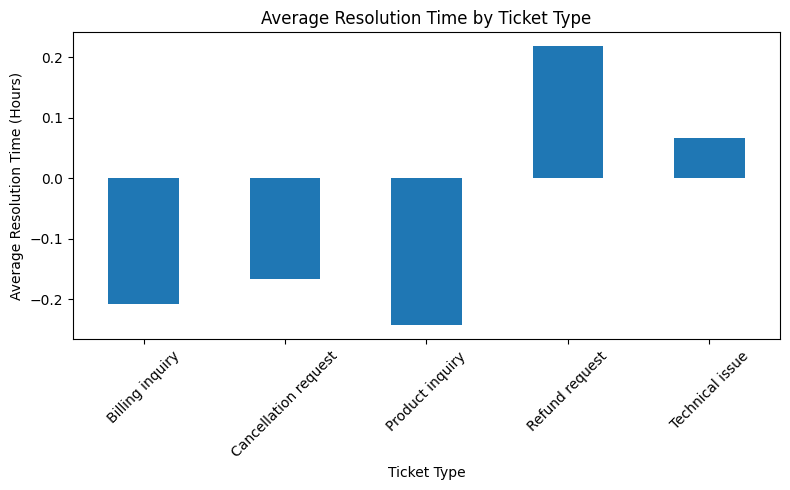

In [5]:
plt.figure(figsize=(8,5))
avg_resolution_by_type.plot(kind='bar')
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
avg_resolution_by_priority = df.groupby('Ticket Priority')['Resolution_Time'].mean()
avg_resolution_by_priority


Ticket Priority
Critical   -0.200689
High       -0.068818
Low         0.385223
Medium     -0.307853
Name: Resolution_Time, dtype: float64

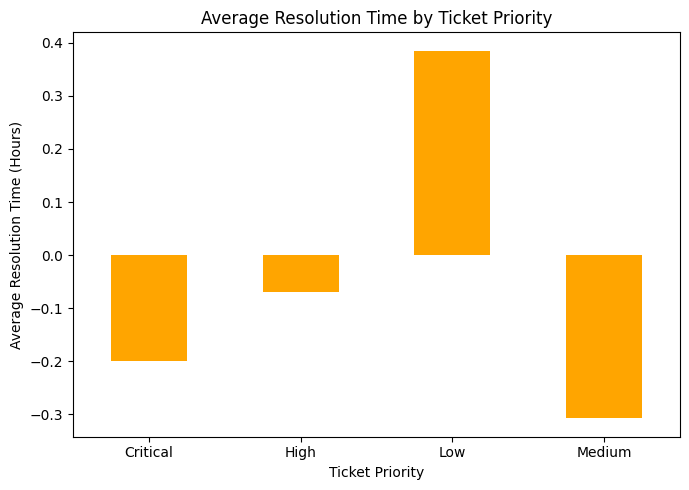

In [7]:
plt.figure(figsize=(7,5))
avg_resolution_by_priority.plot(kind='bar', color='orange')
plt.title("Average Resolution Time by Ticket Priority")
plt.xlabel("Ticket Priority")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
high_priority_df = df[df['Ticket Priority'] == 'High']
high_priority_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Resolution_Time
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,2023-05-31 23:51:49,3,-17.916667
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,2023-06-01 09:27:51,3,-2.633333
14,15,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0,2023-05-31 23:08:55,3,-7.233333
15,16,Elizabeth Foley,amy41@example.net,18,Other,GoPro Action Camera,2021-06-24,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Social media,2023-06-01 15:09:57,NaT,3.0,NaN,3,NaN
17,18,Joshua Castillo,mooredeborah@example.org,56,Female,Microsoft Xbox Controller,2020-09-07,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Chat,2023-06-01 21:05:01,NaT,3.0,NaN,3,NaN


In [9]:
avg_high_priority_by_type = high_priority_df.groupby('Ticket Type')['Resolution_Time'].mean()
avg_high_priority_by_type


Ticket Type
Billing inquiry        -1.609877
Cancellation request   -0.202688
Product inquiry        -0.424936
Refund request          1.442511
Technical issue         0.138217
Name: Resolution_Time, dtype: float64

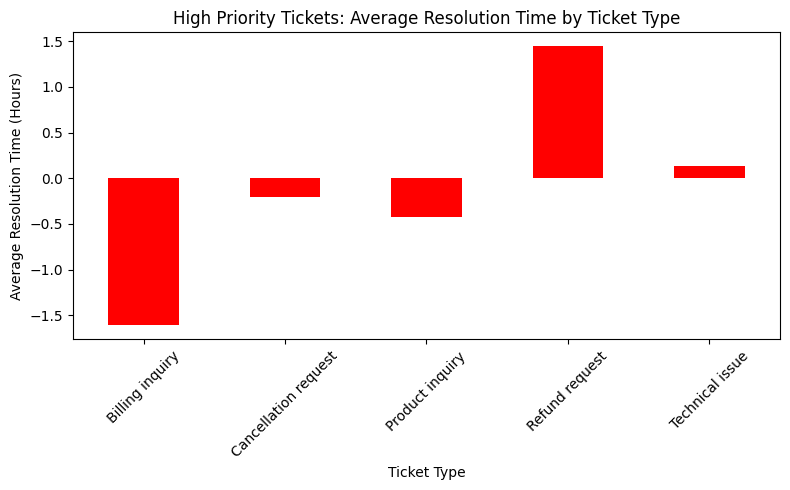

In [10]:
plt.figure(figsize=(8,5))
avg_high_priority_by_type.plot(kind='bar', color='red')
plt.title("High Priority Tickets: Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
